# Reema Almugren

# Project: No-Show appointments Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### No-Show appointments Dataset


### Description:
Miss appointments are a common occurrence in medical clinics across specialties, locales, and practice types. 
Patients miss appointments for a variety of reasons, and those who miss more frequently than others share common demographic characteristics. Practice managers make a concerted effort to lower no-shows by employing a range of techniques, but frequently these strategies include manual procedures or rigid rules that have little effect.[1]

### Questions:
*	What is the percentage of missed and show up appointments?
*	Does receive SMS will reduce the missing appointment number?
*	What is the place that has the most missed appointments?
*	Which gender tends to miss their appointments?

In [573]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# the magic word to popup the plot under its code
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [574]:
# Loading dataset
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [575]:
df.shape

(110527, 14)

Here we have in our dataset there are +110k rows and 14 columns

Now let check the column types

In [576]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There are 3 different columns datatype and there are:
<br/>float  --> 1 column
<br/>int    --> 8 columns
<br/>object --> 5 columns

In [577]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [578]:
# Check if there any null values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [579]:
# Drop unnessessary column
df.drop('Scholarship', axis=1,inplace=True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,1,1,0,0,0,No


In [580]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Hipertension    110527 non-null  int64  
 8   Diabetes        110527 non-null  int64  
 9   Alcoholism      110527 non-null  int64  
 10  Handcap         110527 non-null  int64  
 11  SMS_received    110527 non-null  int64  
 12  No-show         110527 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usage: 11.0+ MB


In [581]:
# Number of values in each column and how many times it accure
for i in df.columns :
    print(i)
    print(df[i].value_counts())
    print('-'*100)

PatientId
8.221459e+14    88
9.963767e+10    84
2.688613e+13    70
3.353478e+13    65
6.264199e+12    62
                ..
8.622636e+11     1
9.267587e+12     1
5.764356e+12     1
5.712491e+12     1
1.557663e+13     1
Name: PatientId, Length: 62299, dtype: int64
----------------------------------------------------------------------------------------------------
AppointmentID
5642903    1
5692618    1
5687640    1
5740664    1
5740598    1
          ..
5718442    1
5426425    1
5424230    1
5720832    1
5629448    1
Name: AppointmentID, Length: 110527, dtype: int64
----------------------------------------------------------------------------------------------------
Gender
F    71840
M    38687
Name: Gender, dtype: int64
----------------------------------------------------------------------------------------------------
ScheduledDay
2016-05-06T07:09:54Z    24
2016-05-06T07:09:53Z    23
2016-04-25T17:18:27Z    22
2016-04-25T17:17:46Z    22
2016-04-25T17:17:23Z    19
                      

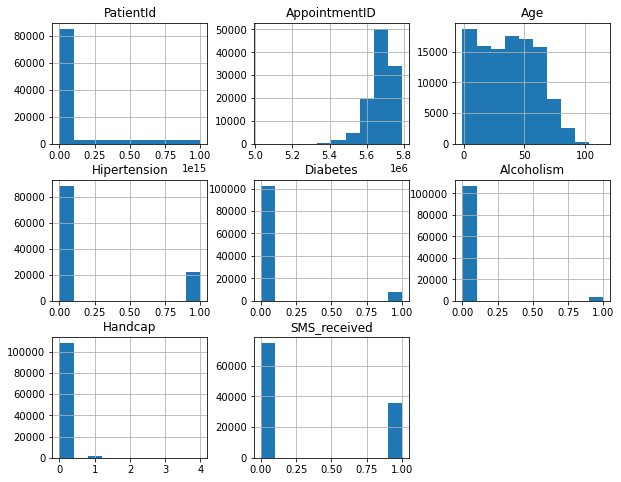

In [582]:
# Visualizing data values
df.hist(figsize=(10,8));

In [583]:
# This is misleading value so we have two choice 1 drop it 
# or change it but in this case because it is only 1 row we will drop it
df[df['Age'] < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,No


In [584]:
# Dropping row
df.drop(df.loc[df['Age'] < 0].index, inplace=True)

In [585]:
# Check after drop
df[df['Age'] < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [586]:
# This information maybe for babies who age less than 1 year (new born babies)
df[df['Age'] == 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
59,7.184428e+13,5638545,F,2016-04-29T08:08:43Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,No
63,2.366233e+14,5628286,M,2016-04-27T10:46:12Z,2016-04-29T00:00:00Z,0,SÃO BENEDITO,0,0,0,0,0,No
64,1.885174e+14,5616082,M,2016-04-25T13:28:21Z,2016-04-29T00:00:00Z,0,ILHA DAS CAIEIRAS,0,0,0,0,1,No
65,2.718818e+14,5628321,M,2016-04-27T10:48:50Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,No
67,8.647128e+13,5639264,F,2016-04-29T08:53:02Z,2016-04-29T00:00:00Z,0,NOVA PALESTINA,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110345,1.473952e+14,5702537,F,2016-05-16T12:30:58Z,2016-06-01T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,No
110346,5.577525e+12,5777724,M,2016-06-06T14:22:34Z,2016-06-08T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,No
110454,6.142460e+11,5772400,F,2016-06-03T15:18:44Z,2016-06-03T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,No
110460,4.321846e+13,5769545,F,2016-06-03T08:56:51Z,2016-06-03T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,No


## Changing 'No-show' values to showed up & missed 
wich Yes --> missed & No --> showed up

In [587]:
# See 'No' values before change
df[df['No-show'] == 'No' ]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,1,No


In [588]:
# Changing values from 'No' to 'showup'
df.loc[df['No-show'] == 'No'  , 'No-show'] = 'showup'

In [589]:
# Check if still there any 'No' values 
df[df['No-show'] == 'No' ]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [590]:
# Check 'showup' values
df[df['No-show'] == 'showup' ]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,1,0,0,0,0,showup
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,showup
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,showup
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,showup
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,1,1,0,0,0,showup
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,1,showup
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,1,showup
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,1,showup
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,1,showup


In [591]:
# See 'Yes' values before change
df[df['No-show'] == 'Yes' ]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,Yes
11,7.542951e+12,5620163,M,2016-04-26T08:44:12Z,2016-04-29T00:00:00Z,29,NOVA PALESTINA,0,0,0,0,1,Yes
17,1.479497e+13,5633460,F,2016-04-28T09:28:57Z,2016-04-29T00:00:00Z,40,CONQUISTA,0,0,0,0,0,Yes
20,6.222575e+14,5626083,F,2016-04-27T07:51:14Z,2016-04-29T00:00:00Z,30,NOVA PALESTINA,0,0,0,0,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110484,5.133650e+14,5772155,F,2016-06-03T14:43:56Z,2016-06-07T00:00:00Z,45,BARRO VERMELHO,0,0,0,0,0,Yes
110492,6.456342e+14,5786741,M,2016-06-08T08:50:19Z,2016-06-08T00:00:00Z,33,MARIA ORTIZ,1,0,0,0,0,Yes
110496,8.544295e+13,5779046,F,2016-06-06T17:35:38Z,2016-06-08T00:00:00Z,37,MARIA ORTIZ,1,0,0,0,0,Yes
110515,6.456342e+14,5778621,M,2016-06-06T15:58:05Z,2016-06-08T00:00:00Z,33,MARIA ORTIZ,1,0,0,0,0,Yes


In [592]:
# Changing values from 'Yes' to 'missed'
df.loc[df['No-show'] == 'Yes'  , 'No-show'] = 'missed'

In [593]:
# Check if still there any 'Yes' values 
df[df['No-show'] == 'Yes' ]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [594]:
# Check 'missed' values
df[df['No-show'] == 'missed' ]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,missed
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,missed
11,7.542951e+12,5620163,M,2016-04-26T08:44:12Z,2016-04-29T00:00:00Z,29,NOVA PALESTINA,0,0,0,0,1,missed
17,1.479497e+13,5633460,F,2016-04-28T09:28:57Z,2016-04-29T00:00:00Z,40,CONQUISTA,0,0,0,0,0,missed
20,6.222575e+14,5626083,F,2016-04-27T07:51:14Z,2016-04-29T00:00:00Z,30,NOVA PALESTINA,0,0,0,0,0,missed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110484,5.133650e+14,5772155,F,2016-06-03T14:43:56Z,2016-06-07T00:00:00Z,45,BARRO VERMELHO,0,0,0,0,0,missed
110492,6.456342e+14,5786741,M,2016-06-08T08:50:19Z,2016-06-08T00:00:00Z,33,MARIA ORTIZ,1,0,0,0,0,missed
110496,8.544295e+13,5779046,F,2016-06-06T17:35:38Z,2016-06-08T00:00:00Z,37,MARIA ORTIZ,1,0,0,0,0,missed
110515,6.456342e+14,5778621,M,2016-06-06T15:58:05Z,2016-06-08T00:00:00Z,33,MARIA ORTIZ,1,0,0,0,0,missed


In [595]:
# check up no-show value
df.value_counts('No-show')

No-show
showup    88207
missed    22319
dtype: int64

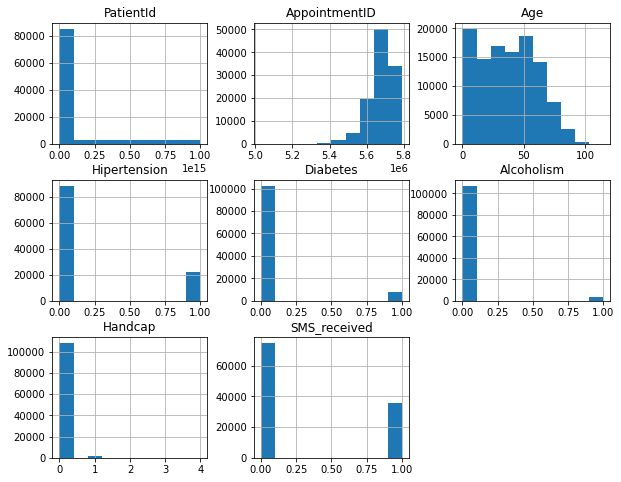

In [596]:
df.hist(figsize=(10,8));

<a id='eda'></a>
## Exploratory Data Analysis
### Research Question 1: What is the percentage of miss and show up appointments?

In [597]:
# Get the number for each miss and showup values
df['No-show'].value_counts()

showup    88207
missed    22319
Name: No-show, dtype: int64

In [598]:
# Visualize findings with percentage
fig=px.pie(df,names=['showup','missed'],values=df['No-show'].value_counts(),
           title="<b>Precentage of missing appointmnets ",template='plotly',
           color_discrete_sequence=px.colors.qualitative.Safe)
fig.update_layout(title_font_size=25)

### 20% of paitients missed their appointments 

____________________________________________________________________________________________________
### Research Question 2: Does recieving SMS will reduce the missing appointment number?

In [599]:
v1= df.SMS_received[showup].value_counts()
v1

0    62509
1    25698
Name: SMS_received, dtype: int64

In [600]:
v2= df.SMS_received[missed].value_counts()
v2

0    12535
1     9784
Name: SMS_received, dtype: int64

In [601]:
# Plotting showing up in their appoitntmnet or miss it with and without recieving SMS
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(go.Pie(
     values=[item[1] for item in sorted(v1.items())],hole=0.5,
     labels=[item[0] for item in sorted(v1.items())],
     domain=dict(x=[0, 0.5]),
     name="show up",title='Show up'), 
     row=1, col=1)
fig.update_traces(marker=dict(colors=['#daa190', '#889e81']))
fig.add_trace(go.Pie(
     values=[item[1] for item in sorted(v2.items())],hole=0.5,
     labels=[item[0] for item in sorted(v2.items())],
     domain=dict(x=[0.5, 1.0]),
     name="missed",title='Missed'),
    row=1, col=2)

fig.update_layout(
    title={'text':'Received SMS vs Appointments','yanchor': 'top','y':0.9,'x':0.35},
    xaxis_title="X Axis Title",
    yaxis_title="Y Axis Title",
    legend_title="Received SMS",
    font=dict(size=18)
)

#### - Here we can see that the paitients who don't received SMS is the majority in show up 
#### - But in missed appointments it is almost equal
## That means receiving SMS is not the main factor to miss appointments

_____________________________________________________________________________________________________
### Research Question 3 : What is the place that have most missed appointments?

C:\Users\reemo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


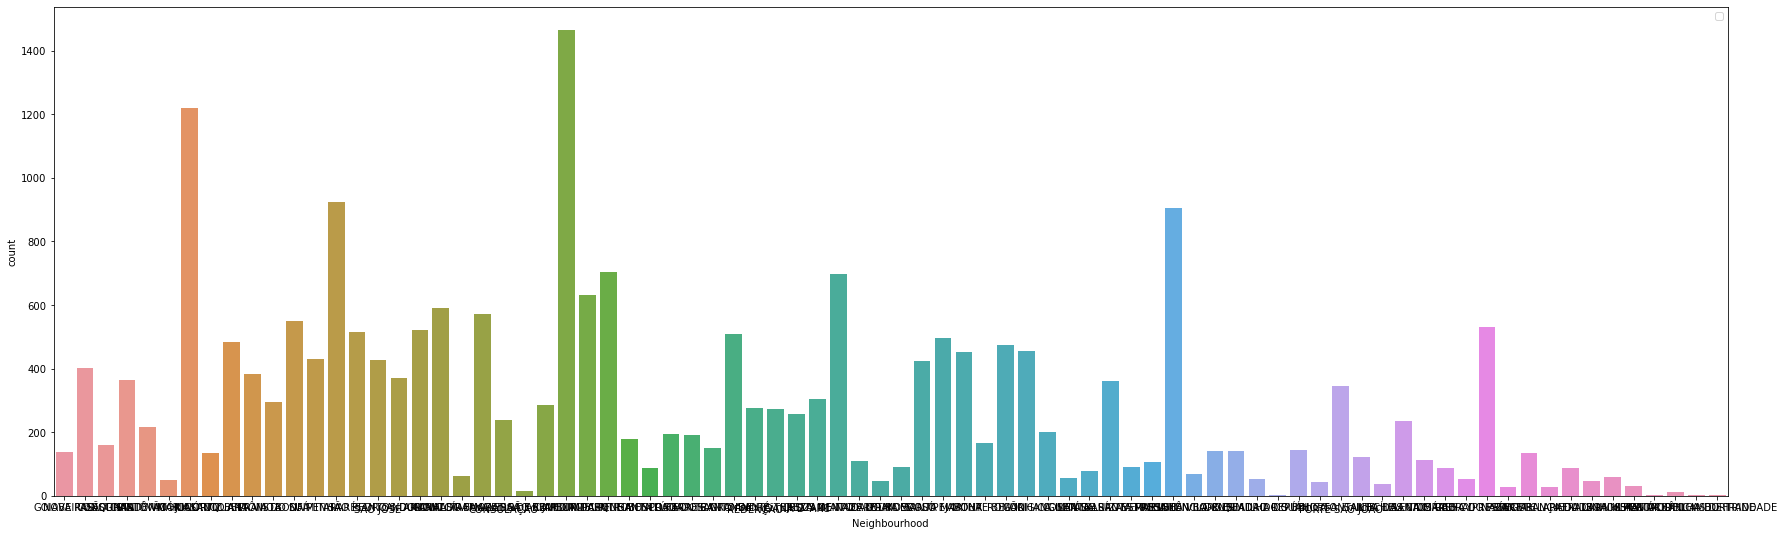

In [602]:
# Visualize miss appointments based on Neighbourhood
plt.figure(figsize=(30,9))
sns.countplot(df.Neighbourhood[missed])
plt.legend()

In [603]:
df.Neighbourhood[missed].value_counts()

JARDIM CAMBURI                 1465
MARIA ORTIZ                    1219
ITARARÉ                         923
RESISTÊNCIA                     906
CENTRO                          703
                               ... 
PONTAL DE CAMBURI                12
ILHA DO BOI                       3
ILHAS OCEÂNICAS DE TRINDADE       2
ILHA DO FRADE                     2
AEROPORTO                         1
Name: Neighbourhood, Length: 80, dtype: int64

### - In the figure above that show the neighborhood have the most miss appointments is JARDIM CAMBURI
### - The neighborhood that have the least miss appointments is AEROPORTO

_____________________________________________________________________________________
### Research Question 4 : Which gender tends to miss their appointments?

C:\Users\reemo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



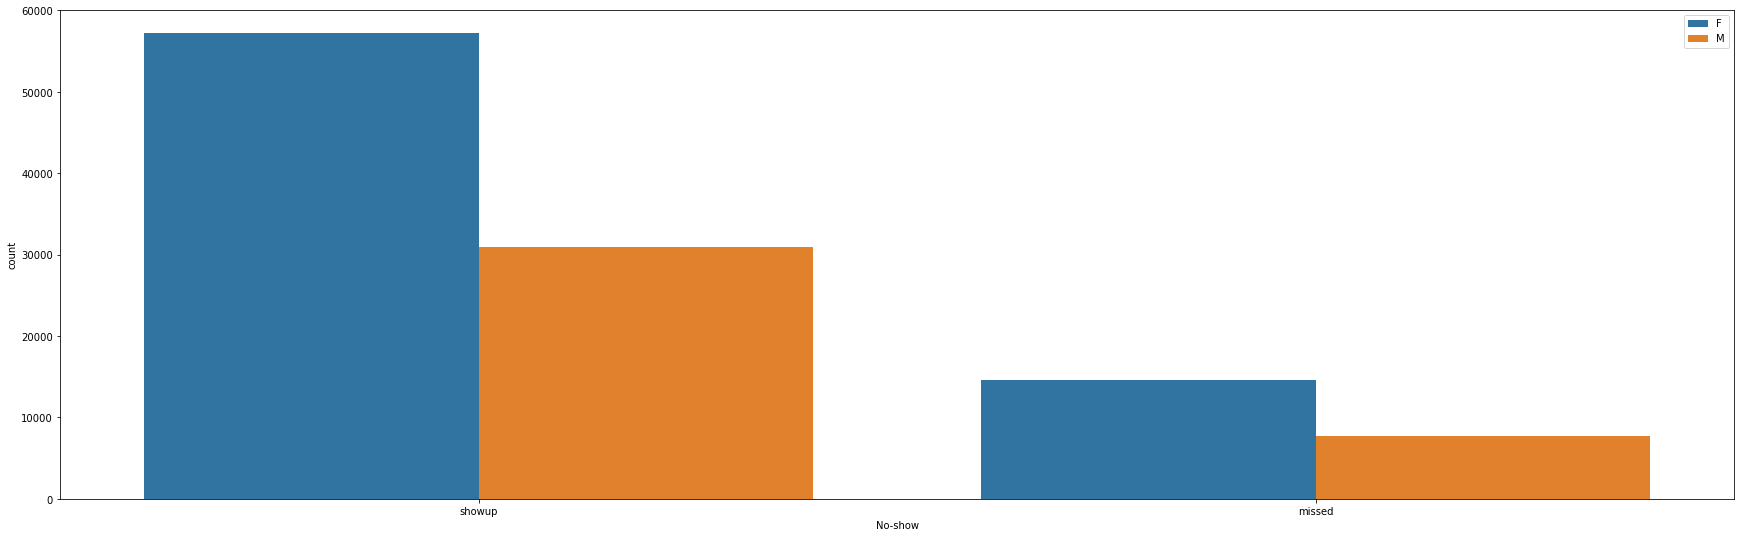

In [604]:
# Visualize miss appointments based on Neighbourhood
plt.figure(figsize=(30,9))
sns.countplot(df['No-show'],hue=df.Gender)
plt.legend()

In [605]:
# numbers of miss for each gender in percentage
df.Gender[missed].value_counts(normalize=True)

F    0.653882
M    0.346118
Name: Gender, dtype: float64

In [606]:
# numbers of showup for each gender in percentage
df.Gender[showup].value_counts(normalize=True)

F    0.648985
M    0.351015
Name: Gender, dtype: float64

#### Female tends to miss their appointments more than males

<a id='conclusions'></a>
## Conclusions

*	20% of patients miss their appointments
*	64% of miss appointments are from females
*	Most of miss appointments is in JARDIM CAMBURI
*	The least miss appointments is AEROPORTO
*	The patients who don't received SMS is the majority in show up
*	Receiving SMS is not the main factor to miss appointments

### References:
[1] https://www.relatient.com/patient-no-shows/